In [2]:
import numpy as np
from keras.models import load_model 
from datasource import ImageGenerator, augmented_data
from train import image_label_paths, AUGMENT_ARGS
import imageio as iio 
import matplotlib.pyplot as plt 
from pdb import set_trace

INDIR = 'MRI_png_processed'
OUTDIR = 'MRI_predicted'
TITLES = ['Predicted', 'Truth']
TISSUE_VAL = { }

## Data augmentation (randomly transformed copy of input samples)

-1.214064 7.37288
-1.2000431 8.466177
-0.9936638 7.580669
-0.783985 6.9829297
-0.7454337 8.357058


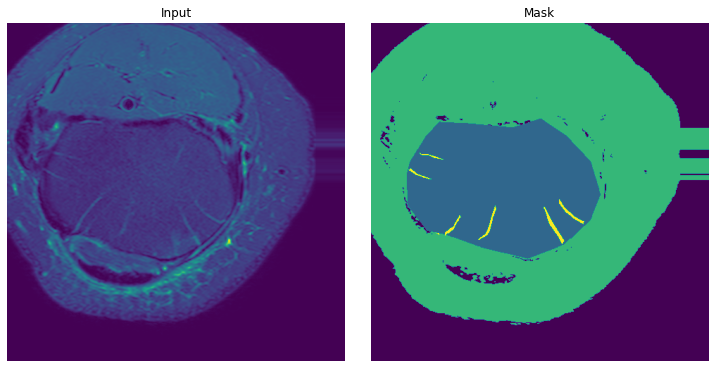

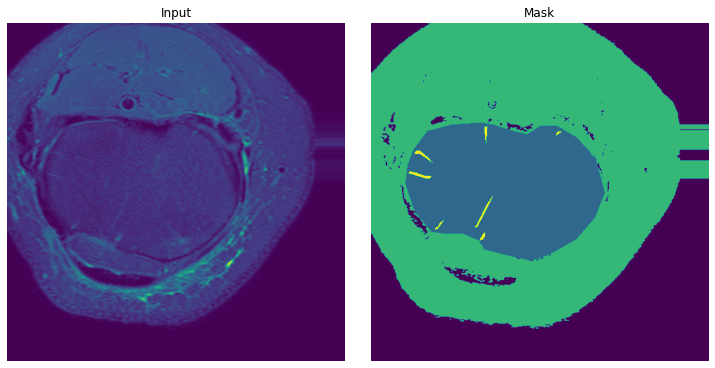

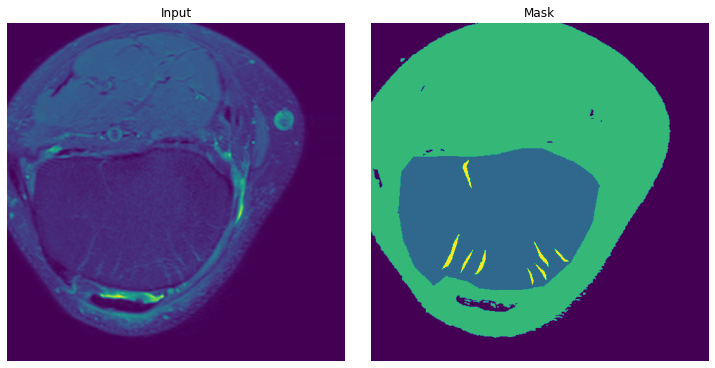

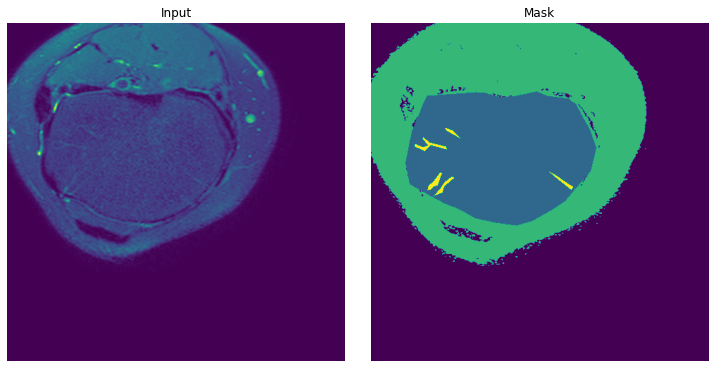

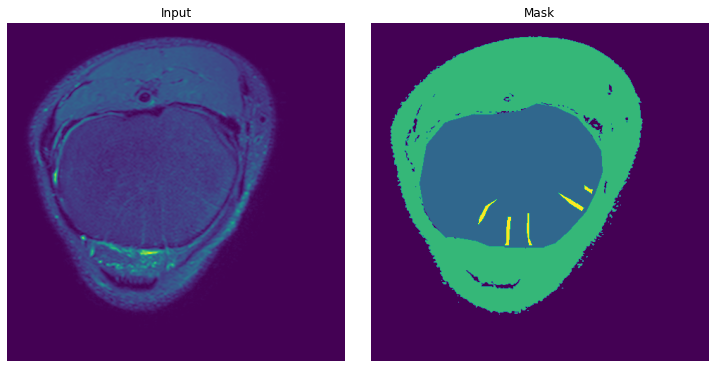

In [3]:
n_batches = 5
batch_size = 1
expansion_factor = 1

ipaths, lpaths = image_label_paths(INDIR)
ipaths = ipaths[:n_batches * batch_size]; lpaths = lpaths[:n_batches * batch_size]
generate = ImageGenerator(ipaths, lpaths, batch_size)

for (images, labels) in augmented_data(generate, expansion_factor, AUGMENT_ARGS):   
    for img, lbl in zip(images, labels):
        # print(img.min(), img.max())
        flt_lbl = lbl.argmax(-1) # flatten down the one-hot label map into integer labels 
        fig, axes = plt.subplots(1, 2, constrained_layout=True)
        fig.set_size_inches(10,5)
        for ax, data, ttl in zip(axes, [img,flt_lbl], ['Input', 'Mask']):
            ax.imshow(np.squeeze(data))
            ax.set_title(ttl)
            ax.set_axis_off()

## Model predictions 

In [ ]:
unet = load_model('unet.h5')

ipaths, lpaths = image_label_paths(INDIR)
generate = ImageGenerator(ipaths, lpaths, 1)

for img, lbl in iter(generate):
    # print(img.min(), img.max())
    pred = unet.predict(img)
    flat_pred = pred.argmax(-1)
    flt_lbl = lbl.argmax(-1) # flatten down the one-hot label map into integer labels 
    fig, axes = plt.subplots(1, 3, constrained_layout=True)
    fig.set_size_inches(10,5)

    for ax, data, ttl in zip(axes, [img,flat_pred,flt_lbl], ['Image'] + TITLES):
        ax.imshow(np.squeeze(data))
        ax.set_title(ttl)
        ax.set_axis_off()